In [6]:
import torch
import random
import json
import os
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#SETUP
LINE_WIDTH = 3
SMALL_SIZE = 15
SMALLER_SIZE = 12
MEDIUM_SIZE = 22
BIG_SIZE = 20
BIGGER_SIZE = 25
ALPHA = 0.3

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)  # legend fontsize
plt.rc('figure', titlesize=SMALLER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.axisbelow'] = True

'''cm=plt.get_cmap('CMRmap')
NUM_COLORS = len(all_papers)+1
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)][::-1]'''
# https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
colors = [(0, 0, 0), 
          (230, 25, 75), 
          (60, 180, 75), 
          (0, 130, 200), 
          (245, 130, 48),
          (145, 30, 180),
          (0, 100, 100), 
          (240, 50, 230), 
          (255, 200, 0),
          (0, 0, 128), 
          #special colors:
          (255, 255, 255), 
          (128, 128, 128),
          #seemingly bad:
          (250, 190, 190),  
          (128, 128, 0), 
          (255, 215, 180),
          (170, 255, 195), 
          (170, 110, 40), 
          (255, 250, 200), 
          (250, 190, 212),  
          (220, 190, 255), 
          (70, 240, 240), 
          (255, 250, 200),
          (170, 255, 195),
         ] 
colors = [[x[0]/255., x[1]/255., x[2]/255.] for x in colors]

colors_d = [[x[0]*0.75, x[1]*0.75, x[2]*0.75] for x in colors]
#Draw the plots without  marker
markers = ['s','D','h','>','o','p','*','x','+']

# Plots

In [8]:
number_of_tokens_list = [0, 1, 2, 4, 8, 16, 32, 64, 128]
# load csv
csv_file = "results/generation_analysis_measures.csv"
df = pd.read_csv(csv_file)

In [9]:
df.head(1)

,model,bleu,bert,bart
0,meta-llama/Llama-2-7b-chat-hf,"[4.124914051605361, 4.218832866882873, 3.97048...","[0.05652845165195686, 0.05854868980259198, 0.0...","[-3.4134188843891025, -3.414521012455225, -3.4..."


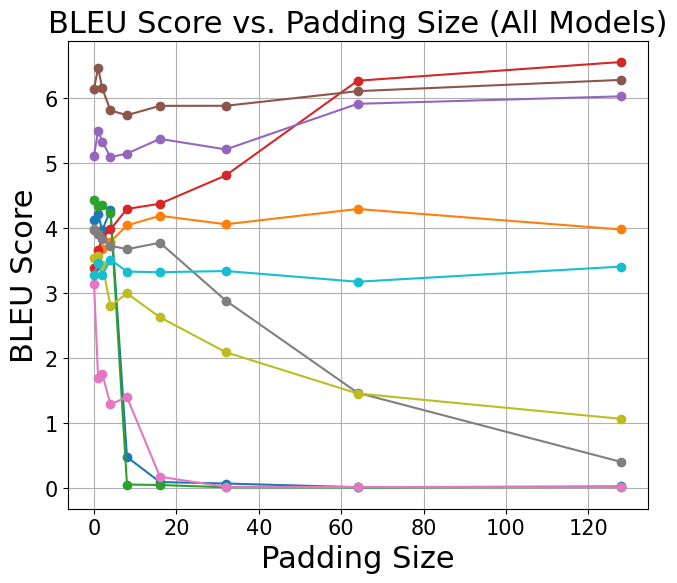

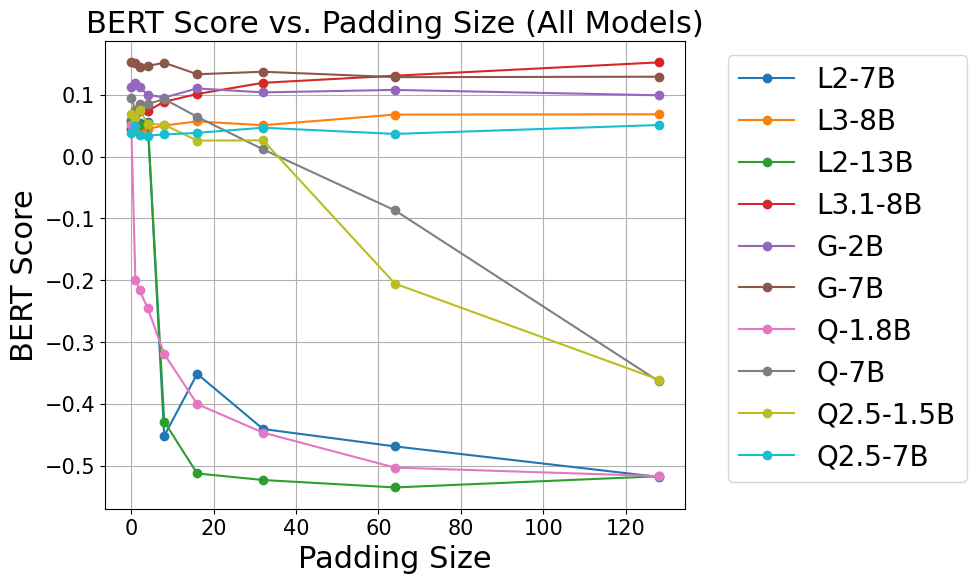

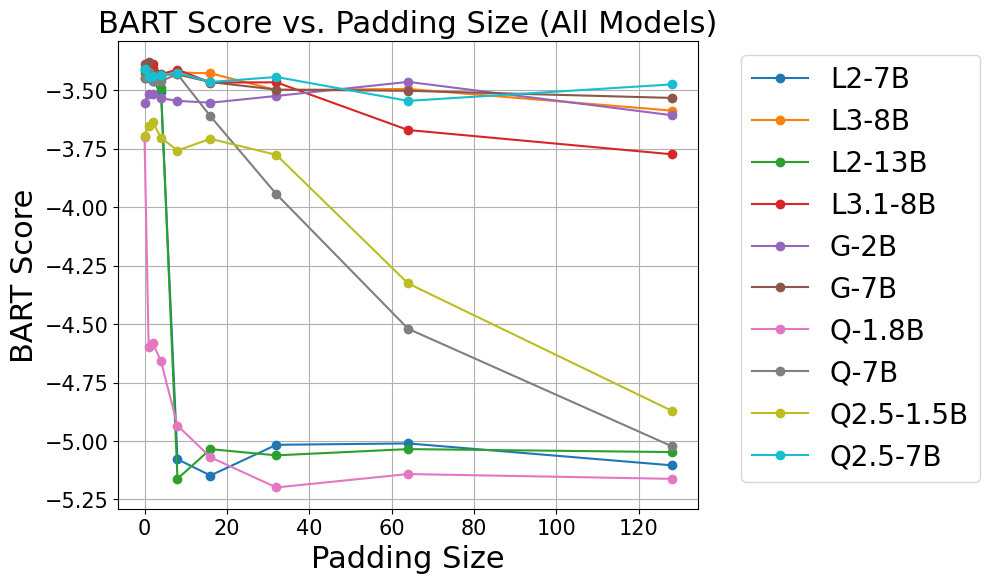

In [19]:
models = df['model'].tolist()
bleu_scores = df['bleu'].apply(json.loads).tolist()
bert_scores = df['bert'].apply(json.loads).tolist()
bart_scores = df['bart'].apply(json.loads).tolist()

number_of_tokens_list = number_of_tokens_list[:len(bleu_scores[0])]

model2shorter = {
    "meta-llama/Llama-2-7b-chat-hf": "L2-7B",
    "meta-llama/Llama-2-13b-chat-hf": "L2-13B",
    "meta-llama/Meta-Llama-3-8B-Instruct": "L3-8B",
    "meta-llama/Llama-3.1-8B-Instruct": "L3.1-8B",
    "google/gemma-2b-it": "G-2B",
    "google/gemma-7b-it": "G-7B",
    "Qwen/Qwen-1_8B-Chat": "Q-1.8B",
    "Qwen/Qwen-7B-Chat": "Q-7B",
    "Qwen/Qwen2.5-1.5B-Instruct": "Q2.5-1.5B",
    "Qwen/Qwen2.5-7B-Instruct": "Q2.5-7B",
}
models = [model2shorter[m] if m in model2shorter else m for m in models]
# --- helpers ---
import os
import matplotlib.pyplot as plt

def plot_metric(x, ys, labels, title, ylabel, outpath, no_legend=False):
	fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=False)

	for y, label in zip(ys, labels):
		ax.plot(x, y, marker='o', label=label)

	ax.set_xlabel("Padding Size")
	ax.set_ylabel(ylabel)
	ax.set_title(title)
	ax.grid(True)

	# Keep axes the same size regardless of legend presence
	fig.subplots_adjust(left=0.12, right=0.7, bottom=0.12, top=0.9)

	if not no_legend:
		ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

	os.makedirs(os.path.dirname(outpath), exist_ok=True)
	plt.show()
	fig.savefig(outpath)
	plt.close(fig)

# --- plots ---
plot_metric(
    number_of_tokens_list, bleu_scores, models,
    "BLEU Score vs. Padding Size (All Models)", "BLEU Score",
    "plots/bleu_score_vs_padding_size.pdf",
    no_legend=True
)

plot_metric(
    number_of_tokens_list, bert_scores, models,
    "BERT Score vs. Padding Size (All Models)", "BERT Score",
    "plots/bert_score_vs_padding_size.pdf"
)

plot_metric(
    number_of_tokens_list, bart_scores, models,
    "BART Score vs. Padding Size (All Models)", "BART Score",
    "plots/bart_score_vs_padding_size.pdf"
)